Some helper code

In [1]:

%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

23704 get-pip.py
3 README.md
143 requirements.txt


#### Importing PyTorch

In [2]:
import torch

In [3]:
# Generating a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [4]:
# Getting the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [5]:
# t.size() is a classic tuple
print('t size:', '\u00D7'.join(map(str, t.size())))
a,b,c = t.size()
a,b,c

t size: 2×3×4


(2, 3, 4)

In [6]:
# to print dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space.')
print(f'organized in {t.dim()} sub-dimensions.')

point in a 24 dimensional space.
organized in 3 sub-dimensions.


In [7]:
t

tensor([[[       nan,        nan, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 4.5696e-41, 0.0000e+00, 0.0000e+00],
         [1.2612e-44, 0.0000e+00, 3.3579e-21, 4.5696e-41]],

        [[1.4677e-37, 0.0000e+00,        nan,        nan],
         [0.0000e+00, 0.0000e+00,        nan,        nan],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 4.5696e-41]]])

In [8]:
# any operation that mutates a tensor in its place is post-fixed with an underscore.
t.random_(10)

tensor([[[4., 7., 1., 2.],
         [7., 2., 1., 0.],
         [1., 1., 0., 3.]],

        [[5., 2., 3., 1.],
         [7., 9., 1., 8.],
         [3., 8., 8., 4.]]])

In [9]:
# to change the shape of the tensor permanently, dimensions should be compatible, 3x8 = 2x3x4
t.resize_(3,8)

tensor([[4., 7., 1., 2., 7., 2., 1., 0.],
        [1., 1., 0., 3., 5., 2., 3., 1.],
        [7., 9., 1., 8., 3., 8., 8., 4.]])

In [10]:
# replaces all with integers
t.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
s = t.clone()
s

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
s.fill_(1)
s # since we have cloned this wouldn't affect t

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

## Vectors (1D Tensors)

In [13]:
# creating a tensor of integers 1 to 4
t = torch.Tensor([1, 2, 3, 4])

In [14]:
t

tensor([1., 2., 3., 4.])

In [15]:
# printing the dimensions and size of tensor
print(f'dim: {t.dim()}, size: {t.size()[0]}')

dim: 1, size: 4


In [16]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [17]:
# Element wise multiplication
t * w

tensor([1., 0., 6., 0.])

In [18]:
# scalar product
t @ w

tensor(7.)

In [19]:
# in place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([0., 8., 2., 8., 4.])

In [20]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 0.0, last: 4.0


In [21]:
# extracting sub-tensor
x[1:2+1]

tensor([8., 2.])

In [22]:
# creating a tensor with integers ranging from 1 to 5, excluding 5
v = torch.Tensor(1, 4 + 1)
v

tensor([[-3.2482e-18,  4.5696e-41,  2.2977e-36,  0.0000e+00,  4.4842e-44]])

In [23]:
# squaring all elements in the tensor
print(v.pow(2), v)

tensor([[1.0551e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]) tensor([[-3.2482e-18,  4.5696e-41,  2.2977e-36,  0.0000e+00,  4.4842e-44]])


## Matrices (2D Tensors)

In [24]:
# creating a 2 x 4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                 [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [25]:
m.dim()

2

In [26]:
print(m.size(0), m.size(1), m.size(), sep = ' -- ')

2 -- 4 -- torch.Size([2, 4])


In [27]:
# to get the total number of elements, hence the name num-el
m.numel()

8

In [28]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [29]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [30]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [31]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [32]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [33]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [34]:
# creating a tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4+1)
v

tensor([1., 2., 3., 4.])

In [35]:
# scalar product
m @ v

tensor([49., 47.])

In [36]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [37]:
# Calculated by 1*4 + 2*2 + 3*1 + 4*9
m[[1], :] @ v

tensor([47.])

In [38]:
# adding a random tensor of 2 x 4 to m
m + torch.rand(2, 4)

tensor([[2.1671, 5.5978, 3.5500, 7.1726],
        [4.9249, 2.2152, 1.0628, 9.7637]])

In [39]:
# subtracting a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.4561, 4.3824, 2.4722, 6.4334],
        [3.5750, 1.4156, 0.7626, 8.3501]])

In [40]:
# multiplying a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.6764, 2.4792, 0.6601, 0.6320],
        [2.0890, 0.8140, 0.0445, 1.2343]])

In [41]:
# dividing m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 2.1676, 12.1649, 11.6151,  9.2574],
        [12.1893,  2.9199,  3.9999, 26.3171]])

In [42]:
m.size()

torch.Size([2, 4])

In [43]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [44]:
# Same as above
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [45]:
# creating a tensor from 3 to 8, with each having a space of 1
torch.arange(3, 8+1)

tensor([3, 4, 5, 6, 7, 8])

In [46]:
# creating a tensor from 5.7 to -2.1, with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [47]:
# returns a 1D tensor of steps equally spaced points between start=3, end = 8 and steps = 20
torch.linspace(3, 8, 20).view(1, -1) # its shape ,would be [1, 20], without view it would be [20]

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [48]:
# create a tensor filled with 0s
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [49]:
# create a tensor filled with 1s
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [50]:
# creating a tensor with diagonals filled with one
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [56]:
# set default plots
# from res.plot_lib import set_default
import matplotlib.pyplot as plt
# set_default()

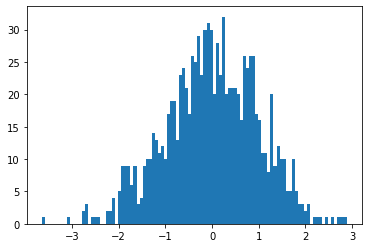

In [58]:
# numpy bridge
plt.hist(torch.randn(1000).numpy(), 100);

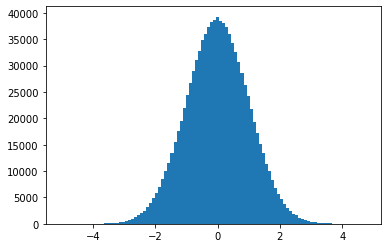

In [60]:
plt.hist(torch.randn(10**6).numpy(), 100); # use rasterized=True for SVG/EPS/PDF!

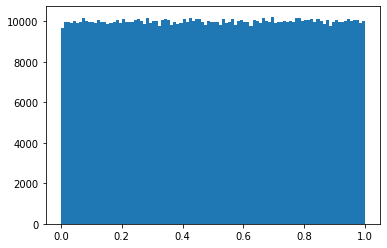

In [61]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [64]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [66]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [67]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [69]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [71]:
#  Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [72]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [74]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [76]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## Extra

In [77]:
# Creates two tensor of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [78]:
# Concatenate on axis 0, so you get 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [79]:
# Concatenate on axis 1, so you get 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

***de nada!***